In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/CODR.csv')

In [3]:
df.head()

,Date,First_Downloads,Installations,Impressions,Event,Angola,Armenia,Australia,Azerbaijan,Georgia,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
0,4/26/2022,1,0,47,Sign Up,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4/27/2022,3,1,52,Sign Up,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4/28/2022,3,1,65,Sign Up,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4/29/2022,1,1,39,Sign Up,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4/30/2022,2,1,26,Sign Up,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  203 non-null    object
 1   First_Downloads       203 non-null    int64 
 2   Installations         203 non-null    int64 
 3   Impressions           203 non-null    int64 
 4   Event                 203 non-null    object
 5   Angola                203 non-null    int64 
 6   Armenia               203 non-null    int64 
 7   Australia             203 non-null    int64 
 8   Azerbaijan            203 non-null    int64 
 9   Georgia               203 non-null    int64 
 10  German                203 non-null    int64 
 11  Indonesia             203 non-null    int64 
 12  Kazakhstan            203 non-null    int64 
 13  Mexico                203 non-null    int64 
 14  Morocco               203 non-null    int64 
 15  Netherlands           203 non-null    in

In [5]:
df.describe()

,First_Downloads,Installations,Impressions,Angola,Armenia,Australia,Azerbaijan,Georgia,German,Indonesia,...,Serbia,Singapore,Slovakia,South Africa,Sweden,Turkey,United Arab Emirates,United Kingdom,United Stated,Vietnam
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.0,203.000000,203.0,203.000000,203.000000,...,203.0,203.000000,203.000000,203.000000,203.000000,203.0,203.000000,203.000000,203.000000,203.0
mean,1.413793,0.640394,42.620690,0.004926,0.004926,0.0,0.004926,0.0,0.009852,0.699507,...,0.0,0.009852,0.014778,0.014778,0.019704,0.0,0.009852,0.054187,0.054187,0.0
std,1.355665,0.869587,15.625853,0.070186,0.070186,0.0,0.070186,0.0,0.140372,1.283309,...,0.0,0.140372,0.156630,0.156630,0.198025,0.0,0.099012,0.301842,0.284970,0.0
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.000000,41.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,2.000000,1.000000,54.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,5.000000,5.000000,92.000000,1.000000,1.000000,0.0,1.000000,0.0,2.000000,7.000000,...,0.0,2.000000,2.000000,2.000000,2.000000,0.0,1.000000,3.000000,2.000000,0.0


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date'] = df['Date'].dt.strftime('%Y-%m')

In [ ]:
df.rename(columns = {'South Africa' : 'SouthAfrica', 'United Arab Emirates' : 'UAE', 'United Kingdom' : 'UK', 'United Stated' : 'US'}, inplace = True)

In [8]:
INA = df[['Date',"First_Downloads",'Installations','Impressions','Event','Indonesia']]

In [9]:
INA.head(10)

,Date,First_Downloads,Installations,Impressions,Event,Indonesia
0,2022-04,1,0,47,Sign Up,0
1,2022-04,3,1,52,Sign Up,0
2,2022-04,3,1,65,Sign Up,3
3,2022-04,1,1,39,Sign Up,0
4,2022-04,2,1,26,Sign Up,1
5,2022-05,1,1,22,Sign Up,0
6,2022-05,0,0,25,Sign Up,0
7,2022-05,1,0,26,Sign Up,0
8,2022-05,2,0,38,Sign Up,0
9,2022-05,0,0,29,Sign Up,0


In [ ]:
INA['Date'] = pd.to_datetime(INA['Date']) - pd.to_timedelta(7, unit='d')

#calculate sum of values, grouped by week
signUp = INA.groupby([pd.Grouper(key='Date', freq='W')])['Indonesia'].sum()
Impressions = INA.groupby([pd.Grouper(key='Date', freq='W')])['Impressions'].sum()
Downloads = INA.groupby([pd.Grouper(key='Date', freq='W')])['First_Downloads'].sum()

In [ ]:
Impressions.head()

Date
2022-04-24    251
2022-05-01    187
2022-05-08    171
2022-05-15    197
2022-05-22    241
Freq: W-SUN, Name: Impressions, dtype: int64

In [ ]:
signUp = pd.DataFrame(signUp)
Impressions = pd.DataFrame(Impressions)
Downloads = pd.DataFrame(Downloads)

In [ ]:
merge = pd.merge(pd.merge(signUp,Impressions,on='Date'),Downloads,on='Date')
merge.reset_index(inplace=True)
merge = merge.rename(columns = {'index':'Date'})
merge.head()

,Date,Indonesia,Impressions,First_Downloads
0,2022-04-24,4,251,11
1,2022-05-01,2,187,4
2,2022-05-08,9,171,9
3,2022-05-15,2,197,9
4,2022-05-22,5,241,8


In [ ]:
merge.shape

(30, 4)

In [10]:
print('Angka Kosong di Negara : ',(INA['Indonesia'] == 0).sum())
print('Angka Kosong di Impression : ',(INA['Impressions'] == 0).sum())
print('Angka Kosong di First_Downloads : ',(INA['First_Downloads'] == 0).sum())

Angka Kosong di Negara :  137
Angka Kosong di Impression :  0
Angka Kosong di First_Downloads :  65


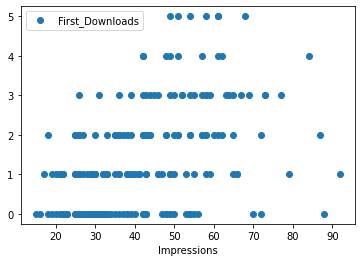

In [12]:
INA.plot(x='Impressions',y='First_Downloads',style='o')

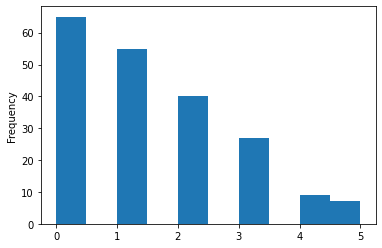

In [13]:
INA['First_Downloads'].plot(kind='hist');

In [ ]:
val = INA['Impressions'].median()
INA['Impressions'] = INA['Impressions'].fillna(val)

In [ ]:
merge['First_Downloads'].value_counts()

9     6
3     3
7     3
12    3
8     2
16    2
5     2
11    1
4     1
10    1
22    1
13    1
19    1
15    1
14    1
1     1
Name: First_Downloads, dtype: int64

In [14]:
data = INA[['First_Downloads','Impressions']]
data.head()

,First_Downloads,Impressions
0,1,47
1,3,52
2,3,65
3,1,39
4,2,26


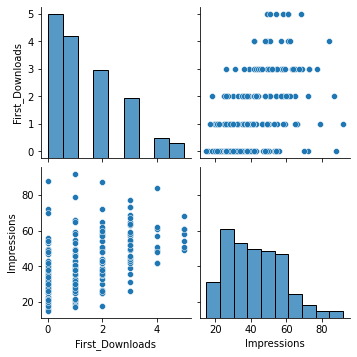

In [15]:
sns.pairplot(data)

In [16]:
X= data.drop(['First_Downloads'],axis=1)
y = data['First_Downloads']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([[0.03621049]])

In [20]:
y_pred= regressor.predict(X_test)

In [21]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
15,2,1.027062
9,0,0.990852
115,2,1.534009
78,1,1.497799
66,1,0.990852
45,0,1.027062
143,0,1.751272
177,3,2.258219
200,5,2.149587
180,2,1.678851


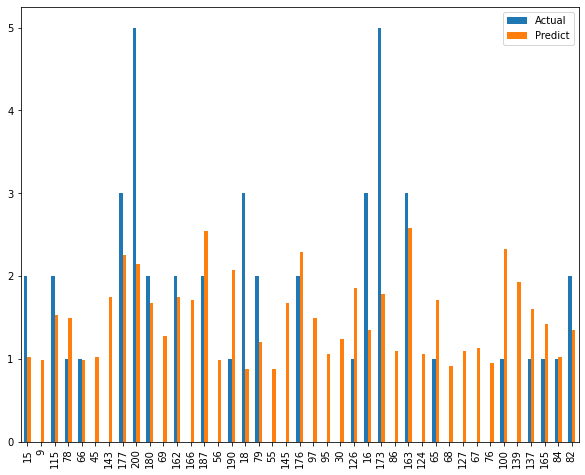

In [22]:
result.plot(kind = 'bar', figsize = (10,8))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

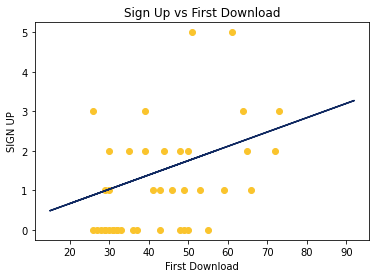

In [23]:
plt.scatter(X_test,y_test,color='#FAC42D')
plt.plot(X_train,regressor.predict(X_train),color='#112A62')
plt.title('Sign Up vs First Download')
plt.xlabel('First Download')
plt.ylabel('SIGN UP')
plt.show

In [24]:
print('Nilai MAE Sebesar :',mean_absolute_error(y_test, y_pred))
print('NIlai MAPE Sebesar :',mean_absolute_percentage_error(y_test, y_pred))
print('NIlai R-Squared Sebesar :',r2_score(y_test, y_pred))

Nilai MAE Sebesar : 1.0524269924985157
NIlai MAPE Sebesar : 2452312229992853.0
NIlai R-Squared Sebesar : 0.12996081329183995
